## Import Package

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## Load Dataset

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Preprocessing (20 point)

1. lakukan data preprocessing termasuk kecuali melakukan reduksi dimensi

In [3]:
boston.shape

(506, 14)

In [4]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
unscaled_X = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
y = pd.DataFrame(boston_dataset.target)

In [8]:
scaler = StandardScaler()
scaler.fit(unscaled_X)
X = scaler.transform(unscaled_X)

new_df = pd.DataFrame(data = X, columns = list(unscaled_X))
new_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727


In [9]:
covariance_matrix = np.cov(X.T)
covariance_matrix

array([[ 1.0019802 , -0.20086619,  0.40738853, -0.05600226,  0.42180532,
        -0.21968085,  0.35343273, -0.38042191,  0.62674377,  0.5839183 ,
         0.29051973, -0.38582644,  0.4565237 ],
       [-0.20086619,  1.0019802 , -0.53488527, -0.04278127, -0.51762669,
         0.31260839, -0.57066514,  0.66572388, -0.31256554, -0.31518622,
        -0.39245415,  0.17586788, -0.41381239],
       [ 0.40738853, -0.53488527,  1.0019802 ,  0.06306266,  0.76516363,
        -0.39245145,  0.6460553 , -0.70942902,  0.59630775,  0.72218743,
         0.38400646, -0.35768342,  0.60499536],
       [-0.05600226, -0.04278127,  0.06306266,  1.0019802 ,  0.09138341,
         0.09143192,  0.0866891 , -0.09937217, -0.00738283, -0.03565699,
        -0.1217558 ,  0.0488851 , -0.05403609],
       [ 0.42180532, -0.51762669,  0.76516363,  0.09138341,  1.0019802 ,
        -0.30278658,  0.73291856, -0.77075334,  0.61265134,  0.66934602,
         0.1893068 , -0.38080321,  0.59204898],
       [-0.21968085,  0.312608

In [10]:
# Using np.linalg.eig function
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[-0.2509514   0.31525237 -0.24656649 -0.06177071  0.08215692  0.21965961
  -0.77760721 -0.15335048 -0.0459523  -0.26039028  0.08676107  0.10964435
  -0.01936913]
 [ 0.25631454  0.3233129  -0.29585782 -0.12871159  0.32061699  0.3233881
   0.27499628  0.40268031  0.08091897 -0.35813749 -0.07142528 -0.26275629
  -0.26752723]
 [-0.34667207 -0.11249291  0.01594592 -0.01714571 -0.00781119  0.0761379
   0.33957645 -0.17393172  0.25107654 -0.64441615 -0.11319963  0.30316943
   0.36353226]
 [-0.00504243 -0.45482914 -0.28978082 -0.81594136  0.08653094 -0.16749014
  -0.07413621  0.02466215 -0.03592171  0.01372777 -0.00398268 -0.01392667
   0.00618184]
 [-0.34285231 -0.21911553 -0.12096411  0.12822614  0.13685356  0.15298267
   0.19963484 -0.08012056 -0.04363045  0.01852201  0.80432257 -0.11131888
  -0.23105645]
 [ 0.18924257 -0.14933154 -0.59396117  0.28059184 -0.4234472  -0.05926707
  -0.06393992  0.32675226 -0.0455671  -0.04789804  0.15287286 -0.05316154
   0.43142019]
 [-0.3136

In [11]:
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

[47.1296063572747, 11.025193247587982, 9.558589792622943, 6.596731600836106, 6.421661052137349, 5.056978272291289, 4.118123739654439, 3.0469024189856686, 0.4885327726267128, 2.1303333054001854, 1.3023305792840134, 1.4308797464566034, 1.6941371148420106]


<BarContainer object of 13 artists>

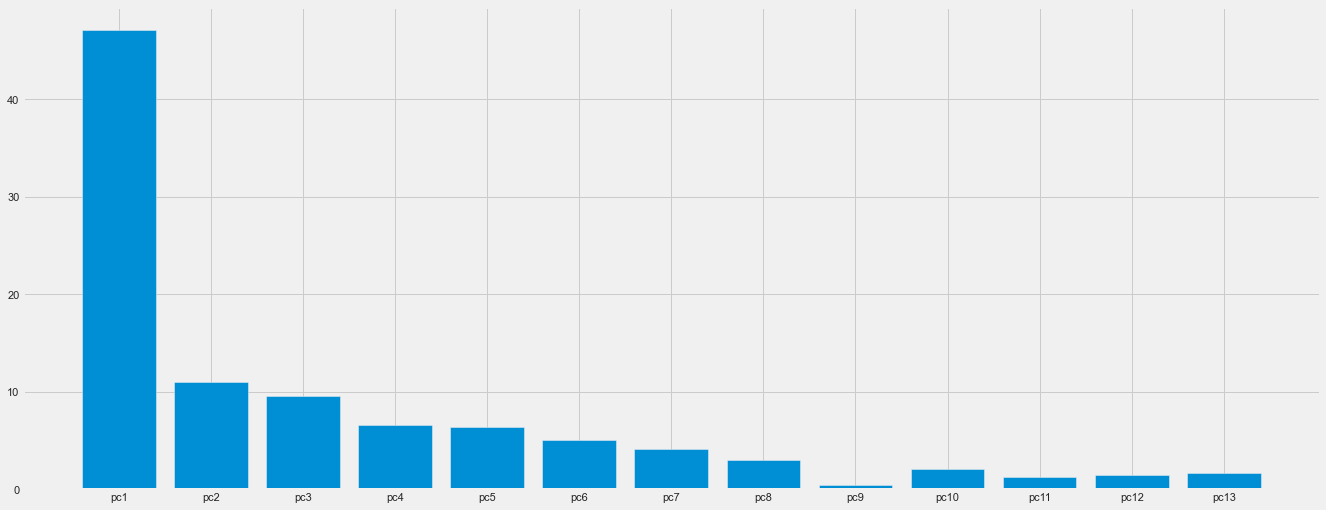

In [12]:
plt.bar(['pc1', 'pc2', 'pc3', 'pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13'], variance_explained)

### PCA Prosess (40)

1. lakukan data preprocessing termasuk melakukan reduksi dimensi dengan PCA (analisis berapa penggunaan PC yang tepat)

In [13]:
scaler = StandardScaler()
scaler.fit(unscaled_X)
X = scaler.transform(unscaled_X)

new_df = pd.DataFrame(data = X, columns = list(unscaled_X))
new_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727


In [14]:
covariance_matrix = np.cov(X.T)
covariance_matrix

array([[ 1.0019802 , -0.20086619,  0.40738853, -0.05600226,  0.42180532,
        -0.21968085,  0.35343273, -0.38042191,  0.62674377,  0.5839183 ,
         0.29051973, -0.38582644,  0.4565237 ],
       [-0.20086619,  1.0019802 , -0.53488527, -0.04278127, -0.51762669,
         0.31260839, -0.57066514,  0.66572388, -0.31256554, -0.31518622,
        -0.39245415,  0.17586788, -0.41381239],
       [ 0.40738853, -0.53488527,  1.0019802 ,  0.06306266,  0.76516363,
        -0.39245145,  0.6460553 , -0.70942902,  0.59630775,  0.72218743,
         0.38400646, -0.35768342,  0.60499536],
       [-0.05600226, -0.04278127,  0.06306266,  1.0019802 ,  0.09138341,
         0.09143192,  0.0866891 , -0.09937217, -0.00738283, -0.03565699,
        -0.1217558 ,  0.0488851 , -0.05403609],
       [ 0.42180532, -0.51762669,  0.76516363,  0.09138341,  1.0019802 ,
        -0.30278658,  0.73291856, -0.77075334,  0.61265134,  0.66934602,
         0.1893068 , -0.38080321,  0.59204898],
       [-0.21968085,  0.312608

In [15]:
# Using np.linalg.eig function
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[-0.2509514   0.31525237 -0.24656649 -0.06177071  0.08215692  0.21965961
  -0.77760721 -0.15335048 -0.0459523  -0.26039028  0.08676107  0.10964435
  -0.01936913]
 [ 0.25631454  0.3233129  -0.29585782 -0.12871159  0.32061699  0.3233881
   0.27499628  0.40268031  0.08091897 -0.35813749 -0.07142528 -0.26275629
  -0.26752723]
 [-0.34667207 -0.11249291  0.01594592 -0.01714571 -0.00781119  0.0761379
   0.33957645 -0.17393172  0.25107654 -0.64441615 -0.11319963  0.30316943
   0.36353226]
 [-0.00504243 -0.45482914 -0.28978082 -0.81594136  0.08653094 -0.16749014
  -0.07413621  0.02466215 -0.03592171  0.01372777 -0.00398268 -0.01392667
   0.00618184]
 [-0.34285231 -0.21911553 -0.12096411  0.12822614  0.13685356  0.15298267
   0.19963484 -0.08012056 -0.04363045  0.01852201  0.80432257 -0.11131888
  -0.23105645]
 [ 0.18924257 -0.14933154 -0.59396117  0.28059184 -0.4234472  -0.05926707
  -0.06393992  0.32675226 -0.0455671  -0.04789804  0.15287286 -0.05316154
   0.43142019]
 [-0.3136

In [16]:
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

[47.1296063572747, 11.025193247587982, 9.558589792622943, 6.596731600836106, 6.421661052137349, 5.056978272291289, 4.118123739654439, 3.0469024189856686, 0.4885327726267128, 2.1303333054001854, 1.3023305792840134, 1.4308797464566034, 1.6941371148420106]


<BarContainer object of 13 artists>

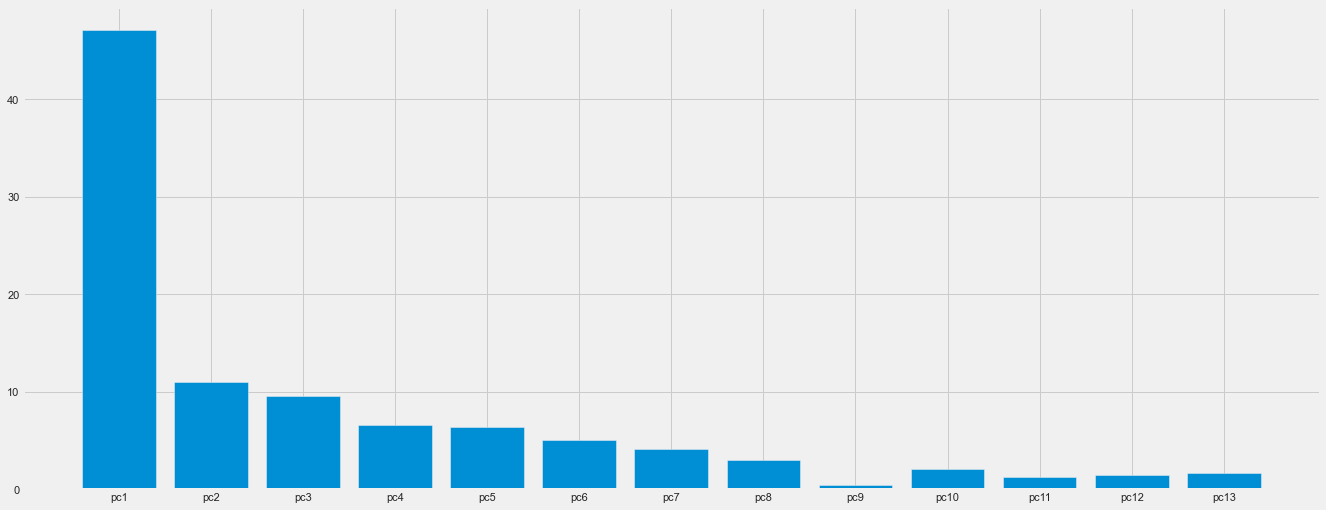

In [17]:
plt.bar(['pc1', 'pc2', 'pc3', 'pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13'], variance_explained)

In [18]:
# Identifying components that explain at least 80%
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 47.12960636  58.1547996   67.7133894   74.310121    80.73178205
  85.78876032  89.90688406  92.95378648  93.44231925  95.57265256
  96.87498314  98.30586289 100.        ]


Text(0.5, 1.0, 'Explained variance vs Number of components')

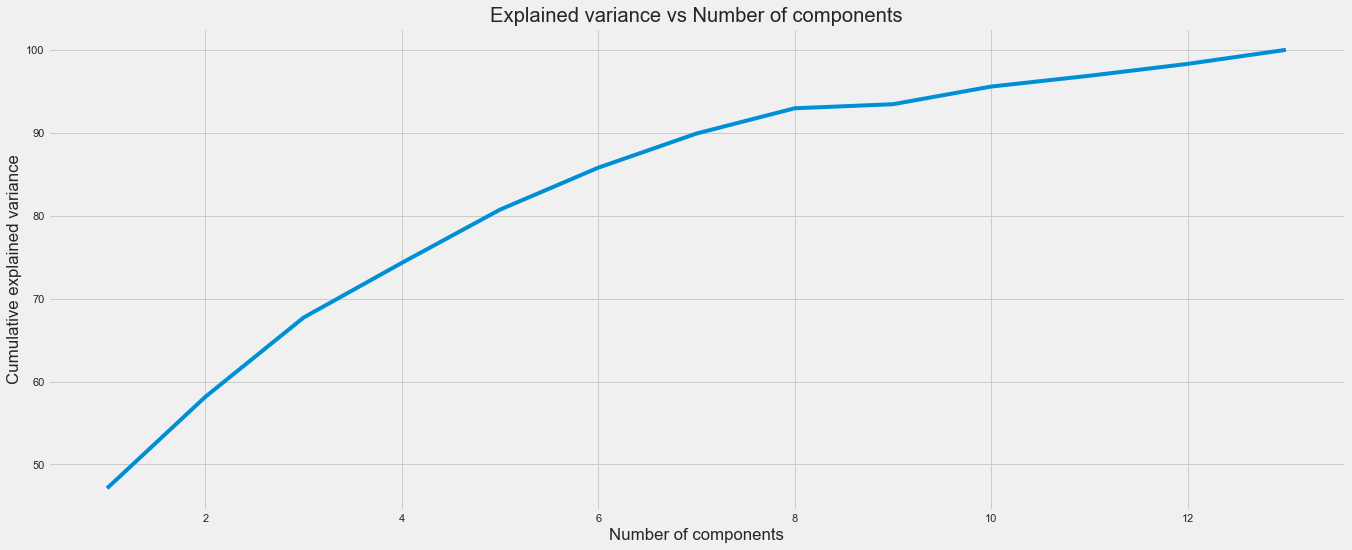

In [19]:
sns.lineplot(x = [1,2,3,4,5,6,7,8,9,10,11,12,13], y=cumulative_variance_explained)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

In [20]:
# Using Five first components (at least upto 80%)
projection_matrix = (eigen_vectors.T[:][:5]).T
print(projection_matrix)

[[-0.2509514   0.31525237 -0.24656649 -0.06177071  0.08215692]
 [ 0.25631454  0.3233129  -0.29585782 -0.12871159  0.32061699]
 [-0.34667207 -0.11249291  0.01594592 -0.01714571 -0.00781119]
 [-0.00504243 -0.45482914 -0.28978082 -0.81594136  0.08653094]
 [-0.34285231 -0.21911553 -0.12096411  0.12822614  0.13685356]
 [ 0.18924257 -0.14933154 -0.59396117  0.28059184 -0.4234472 ]
 [-0.3136706  -0.31197778  0.01767481  0.17520603  0.01669085]
 [ 0.32154387  0.34907     0.04973627 -0.21543585  0.09859225]
 [-0.31979277  0.27152094 -0.28725483 -0.13234996 -0.20413162]
 [-0.33846915  0.23945365 -0.22074447 -0.10333509 -0.13046057]
 [-0.20494226  0.30589695  0.32344627 -0.28262198 -0.58400223]
 [ 0.20297261 -0.23855944  0.3001459  -0.1684985  -0.34560695]
 [-0.30975984  0.07432203  0.26700025 -0.06941441  0.39456113]]


In [21]:
pca = PCA(n_components=13)
pca.fit(X)
pcs = pca.transform(X)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13'])
pdf['MEDV'] = y
pdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,MEDV
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641,0.295832,-0.424937,0.640206,-0.033000,0.019440,0.365975,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861,-0.223670,-0.166962,0.084236,-0.640810,-0.125797,-0.070719,21.6
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560,0.105166,0.069775,-0.180380,-0.487557,0.133327,-0.014022,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,0.622641,0.255941,-0.342246,0.045901,-0.360209,0.508678,0.007847,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,0.705086,-0.134524,-0.417668,-0.140880,-0.395150,0.497732,0.014274,36.2


In [22]:
pca = PCA(n_components=5)
pca.fit(X)
pcs = pca.transform(X)

X_std_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4','pc5'])
X_std_pca['target'] = y
X_std_pca.head()

,pc1,pc2,pc3,pc4,pc5,target
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,21.6
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,36.2


## Regression Model (20 point)

bebas menggunakan model apapun

## Linear Regression Model without Dimensionality Reduction

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
lr = LinearRegression()

# Train the model
model = lr.fit(X_train, y_train)

# Prediction
y_pred =  lr.predict(X_test)

# Accuracy Score
lr.score(X_test, y_test).round(4)

0.6688

## Linear Regression Model with PCA

In [25]:
X_new = X_std_pca.drop('target', axis=1)
Y_new = X_std_pca['target']

X_train_pca, X_test_pca,Y_train_pca,Y_test_pca = train_test_split(X_new,Y_new,
                                                test_size = 0.2,
                                                random_state = 42)

In [26]:
pca_lr = LinearRegression()

# Train the model
pca_model = pca_lr.fit(X_train_pca, Y_train_pca)

# Prediction
pca_y_pred =  pca_lr.predict(X_test_pca)

# Accuracy Score
pca_lr.score(X_test_pca, Y_test_pca).round(4)

0.5934

## Evaluasi (20)

Bandingkan hasil menggunakan PCA dan tidak menggunakan PCA

In [27]:
X_new = X_std_pca.drop('target', axis=1)
Y_new = X_std_pca['target']

X_train_pca, X_test_pca,Y_train_pca,Y_test_pca = train_test_split(X_new,Y_new,
                                                test_size = 0.2,
                                                random_state = 42)

In [28]:
X_train, X_test,Y_train,Y_test = train_test_split(X,y,
                                                test_size = 0.4,
                                                random_state = 42)

## Modelling without PCA

In [29]:
model_pca = DecisionTreeRegressor()
model_pca.fit(X_train_pca, Y_train_pca)

DecisionTreeRegressor()

In [30]:
model_pca.score(X_train_pca, Y_train_pca)

1.0

In [31]:
ypred = model_pca.predict(X_test_pca)

mse = mean_squared_error(Y_test_pca, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

MSE:  23.832156862745098
RMSE:  4.881819011674347


## Modelling with PCA

In [32]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [33]:
model.score(X_train, Y_train)

1.0

In [36]:
ypred = model.predict(X_test)

mse = mean_squared_error(Y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

MSE:  23.566600985221672
RMSE:  4.854544364327271
